# Optimize Machine Learning Models with Hyperparameter Optimization

In [1]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('./heart_failure_clinical_records_dataset.csv') #make sure to replace with your data directory
df.drop(columns=['time'],inplace=True) #drop the time column which is not one of the informative features 
df_features = df.iloc[:,:-1]
df_target = df['DEATH_EVENT']

X = df_features
y = df_target

In [2]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1


In [3]:
y.value_counts(normalize=True)

DEATH_EVENT
0    0.67893
1    0.32107
Name: proportion, dtype: float64

# Create train and test sets


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y,random_state=21)

In [5]:
print('X train shape: ',X_train.shape)
print('y train shape: ',y_train.shape)
print('X test shape: ',X_test.shape)
print('y test shape: ',y_test.shape)
print('y train: ',y_train.value_counts(normalize=True))
print('y test: ',y_test.value_counts(normalize=True))

X train shape:  (209, 11)
y train shape:  (209,)
X test shape:  (90, 11)
y test shape:  (90,)
y train:  DEATH_EVENT
0    0.679426
1    0.320574
Name: proportion, dtype: float64
y test:  DEATH_EVENT
0    0.677778
1    0.322222
Name: proportion, dtype: float64


# Normalize Data

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter Optimization 

## logistic Regression

### Basic Approach


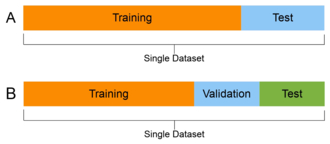

In [7]:
from IPython.display import Image
Image(filename='/Users/bonakdar/Desktop/xTmSM.png')

# create validation set as 10% of train set

# Hyperparameter optimization 

In [11]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the

In [16]:
import warnings
# Suppress all warnings globally
warnings.filterwarnings("ignore")

X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size=0.3,stratify=y,random_state=21)
# Create validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=21, stratify=y_train_full)

print('X train shape: ',X_train.shape)
print('y train shape: ',y_train.shape)
print('X test shape: ',X_test.shape)
print('y test shape: ',y_test.shape)
print('X val shape: ',X_val.shape)
print('y val shape: ',y_val.shape)
print('y train: ',y_train.value_counts(normalize=True))
print('y test: ',y_test.value_counts(normalize=True))
print('y val: ',y_val.value_counts(normalize=True))

# Normalize data based on mean and STD of train data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier


n_estimators_values = [20, 50, 100, 150, 200]
max_depth_values = [5, 10, 13]

best_score = 0
best_params = None

print("Hyperparameter tuning results:\n")

# 5️⃣ Nested loops
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42
        )
        
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        
        print(f"n_estimators = {n_estimators:<3} | "
              f"max_depth = {str(max_depth):<5} | "
              f"Validation Accuracy = {val_accuracy:.4f}")
        
        if val_accuracy > best_score:
            best_score = val_accuracy
            best_params = {
                "n_estimators": n_estimators,
                "max_depth": max_depth
            }

# 6️⃣ Print best hyperparameters
print("\nBest Hyperparameters:")
print(best_params)
print(f"Best Validation Accuracy = {best_score:.4f}")

final_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    random_state=42
)

final_model.fit(X_train_full, y_train_full)

# 8️⃣ Final Test Evaluation
y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nFinal Test Accuracy = {test_accuracy:.4f}")

X train shape:  (188, 11)
y train shape:  (188,)
X test shape:  (90, 11)
y test shape:  (90,)
X val shape:  (21, 11)
y val shape:  (21,)
y train:  DEATH_EVENT
0    0.680851
1    0.319149
Name: proportion, dtype: float64
y test:  DEATH_EVENT
0    0.677778
1    0.322222
Name: proportion, dtype: float64
y val:  DEATH_EVENT
0    0.666667
1    0.333333
Name: proportion, dtype: float64
Hyperparameter tuning results:

n_estimators = 20  | max_depth = 5     | Validation Accuracy = 0.8571
n_estimators = 20  | max_depth = 10    | Validation Accuracy = 0.8095
n_estimators = 20  | max_depth = 13    | Validation Accuracy = 0.8571
n_estimators = 50  | max_depth = 5     | Validation Accuracy = 0.8571
n_estimators = 50  | max_depth = 10    | Validation Accuracy = 0.9048
n_estimators = 50  | max_depth = 13    | Validation Accuracy = 0.9048
n_estimators = 100 | max_depth = 5     | Validation Accuracy = 0.8571
n_estimators = 100 | max_depth = 10    | Validation Accuracy = 0.9048
n_estimators = 100 | max_

# GridSearch CV: Python has a package that can automatically do this optimization for you

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y,random_state=21)

#Normalize data 
# Normalize data based on mean and STD of train data
scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)


model = RandomForestClassifier(random_state=21)

# Define parameter grid
param_grid = {
    'n_estimators': [20, 50, 100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 7, 10, 13],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_n, y_train)

print("\nBest Hyperparameters:")
print(grid.best_params_)

print("\nBest Cross-Validation Accuracy:")
print(grid.best_score_)

y_test_pred = grid.predict(X_test_n)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nFinal Test Accuracy:")
print(test_accuracy)

Fitting 5 folds for each of 150 candidates, totalling 750 fits

Best Hyperparameters:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 50}

Best Cross-Validation Accuracy:
0.7652729384436701

Final Test Accuracy:
0.7333333333333333


# Kaggle Style Competition Challenge

Use GridSearch Approach on different ML classifiers and identify the best model with the highest test accuracy. You will be ranked accordingly. Top 3 students that can return the highest accuracy on test set are the winners. Keep these constant: 

1- X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y,random_state=21)

2- cv=5, scoring='accuracy' in GridSearchCV



# Optuna: Modern Hyperparameter Optimization

Optuna is a lightweight framework for advanced hyperparameter optimization. Unlike GridSearchCV which tests all combinations, Optuna intelligently searches the parameter space.

**Key strategies:**
- **Random Search**: Random sampling from search space
- **Bayesian Optimization (TPE)**: Learns from previous trials to propose better parameters

**Benefits:**
- Much faster than GridSearch (especially with expensive models)
- Handles continuous, discrete, and categorical parameters naturally
- Can prune unpromising trials early
- State-of-the-art for real-world problems

In [ ]:
!pip install optuna -q

## Random Search with Optuna

Random search samples parameters uniformly at random. Simple but effective - just randomly try different combinations and pick the best.

In [ ]:
import optuna
from optuna.samplers import RandomSampler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)
scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

def objective_random(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    }
    model = RandomForestClassifier(**params, random_state=21)
    scores = cross_val_score(model, X_train_n, y_train, cv=5, scoring='accuracy')
    return scores.mean()

study_random = optuna.create_study(direction='maximize', sampler=RandomSampler(seed=21))
study_random.optimize(objective_random, n_trials=50, show_progress_bar=True)

print(f"Best validation accuracy: {study_random.best_value:.4f}")
print(f"Best params: {study_random.best_params}\n")

best_model_random = RandomForestClassifier(**study_random.best_params, random_state=21)
best_model_random.fit(X_train_n, y_train)
test_acc_random = accuracy_score(y_test, best_model_random.predict(X_test_n))
print(f"Test accuracy: {test_acc_random:.4f}")

## Bayesian Optimization (TPE Sampler)

Bayesian Optimization is smarter - it builds a probability model of the objective function and uses it to propose promising parameter combinations. Tree-structured Parzen Estimator (TPE) is the algorithm that makes this work.

The key insight: after each trial, we learn something about which parameters work better, so the next trial is more likely to be good.

In [ ]:
from optuna.samplers import TPESampler

def objective_bayesian(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    }
    model = RandomForestClassifier(**params, random_state=21)
    scores = cross_val_score(model, X_train_n, y_train, cv=5, scoring='accuracy')
    return scores.mean()

study_bayesian = optuna.create_study(direction='maximize', sampler=TPESampler(seed=21))
study_bayesian.optimize(objective_bayesian, n_trials=50, show_progress_bar=True)

print(f"Best validation accuracy: {study_bayesian.best_value:.4f}")
print(f"Best params: {study_bayesian.best_params}\n")

best_model_bayesian = RandomForestClassifier(**study_bayesian.best_params, random_state=21)
best_model_bayesian.fit(X_train_n, y_train)
test_acc_bayesian = accuracy_score(y_test, best_model_bayesian.predict(X_test_n))
print(f"Test accuracy: {test_acc_bayesian:.4f}")

## Quick Comparison

|  | GridSearchCV | Random Search | Bayesian (TPE) |
|---|---|---|---|
| **Speed** | Slow (tests all) | Medium | Fast (learns) |
| **# Evaluations** | All combinations | Fixed budget | Fixed budget |
| **Best for** | Small grids | Simple & parallel | **Real projects** |
| **Pros** | Exhaustive | Simple | Most efficient |
| **Cons** | Expensive | No learning | Slightly complex |

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

random_vals = [t.value for t in study_random.trials]
bayesian_vals = [t.value for t in study_bayesian.trials]

axes[0].plot(random_vals, 'o-', alpha=0.6)
axes[0].axhline(y=study_random.best_value, color='r', linestyle='--', label=f'Best: {study_random.best_value:.4f}')
axes[0].set_title('Random Search')
axes[0].set_xlabel('Trial'), axes[0].set_ylabel('Accuracy')
axes[0].legend(), axes[0].grid(True, alpha=0.3)

axes[1].plot(bayesian_vals, 'o-', alpha=0.6, color='green')
axes[1].axhline(y=study_bayesian.best_value, color='r', linestyle='--', label=f'Best: {study_bayesian.best_value:.4f}')
axes[1].set_title('Bayesian Optimization (TPE)')
axes[1].set_xlabel('Trial'), axes[1].set_ylabel('Accuracy')
axes[1].legend(), axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("="*50)
print(f"{'Method':<20} {'Val Acc':<15} {'Test Acc':<15}")
print("-"*50)
print(f"{'Random Search':<20} {study_random.best_value:<15.4f} {test_acc_random:<15.4f}")
print(f"{'Bayesian (TPE)':<20} {study_bayesian.best_value:<15.4f} {test_acc_bayesian:<15.4f}")
print("="*50)

## When to Use What?

**GridSearchCV** → Small, well-defined parameter grid

**Random Search** → Large search space, easy parallelization needed

**Bayesian Optimization (Optuna)** → **Use this for most real projects!**
- Expensive objective function (long model training)
- Mix of continuous and discrete parameters
- Want best results with reasonable compute
- Working on actual problems (not toy examples)

## Bonus: Pruning (Early Stopping)

If a model looks bad halfway through training, why keep going? Pruning lets Optuna stop unpromising trials early.

```python
def objective_with_pruning(trial):
    for epoch in range(100):
        acc = train_epoch()
        trial.report(acc, epoch)  # Report progress
        
        if trial.should_prune():  # Stop if not promising
            raise optuna.TrialPruned()
    
    return final_accuracy
```

This saves a lot of time, especially with deep learning models.